In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

<H1>1.Introduction</H1>

<H3>Datatset</h3>
This dataset is obtained from Kaggle: Heart Failure Prediction Dataset



<h3>Attribute Information</h3>
Age: age of the patient [years]<br>
Sex: sex of the patient [M: Male, F: Female]<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]

Let's now load the dataset. As we can see above, the variables:

Sex]<br>
ChestPainType]<br>
RestingECG]<br>
ExerciseAngina]<br>
ST_Slope]<br>
Are categorical, so we must one-hot encode them.

In [6]:
# Load the dataset using pandas
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [10]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<h3>Perform Exploratory Data Analysis (EDA)</h3>

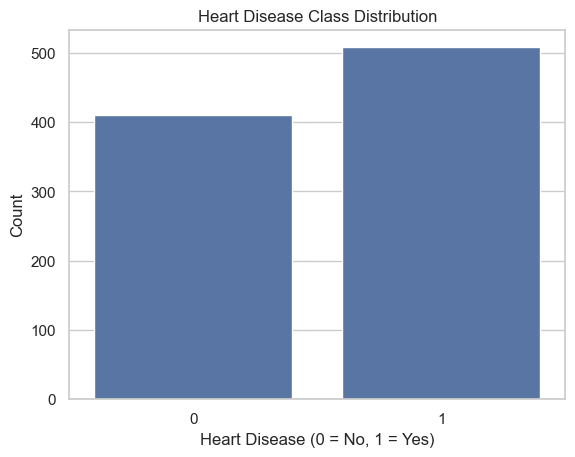

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1️⃣ Class Distribution of Heart Disease
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


<h4>Class Distribution of Heart Disease</h4>
This plot shows the distribution of the target variable, indicating how many individuals have heart disease (target = 1) versus those who do not (target = 0).<br>
<h4>Interpretation:</h4>
Around 410 people have no heart disease (0).<br>

Around 510 people have heart disease (1).<br>

This shows a slightly imbalanced dataset, but not severely. The model can still learn patterns effectively..<br>



<h3>Correlation Heatmap (Numeric Features Only)</h3>

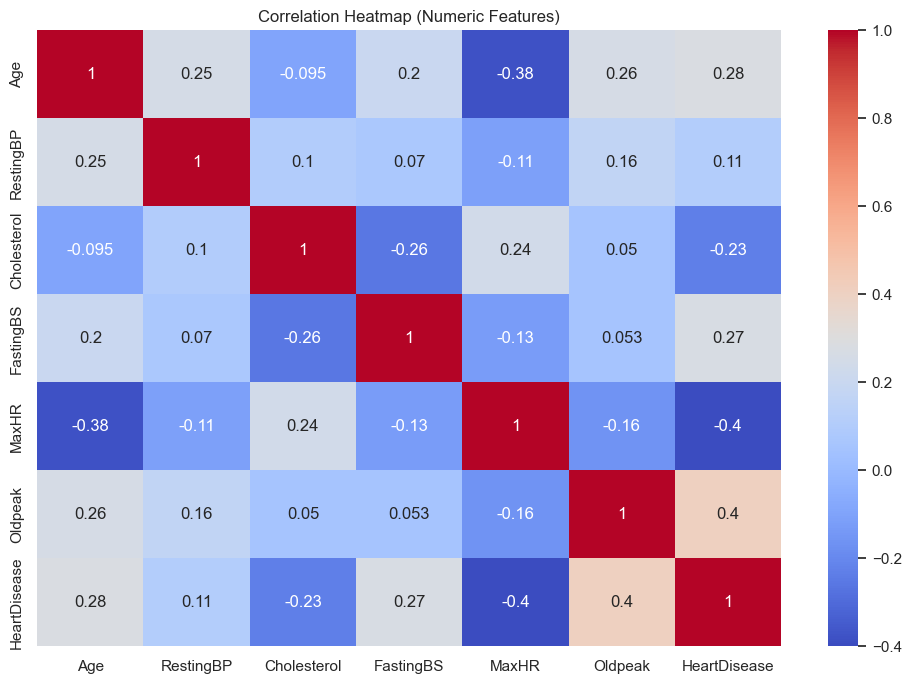

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


<h3>🔍 Key Insights</h3>

<h3> Age Distribution by Heart Disease Status</h3>

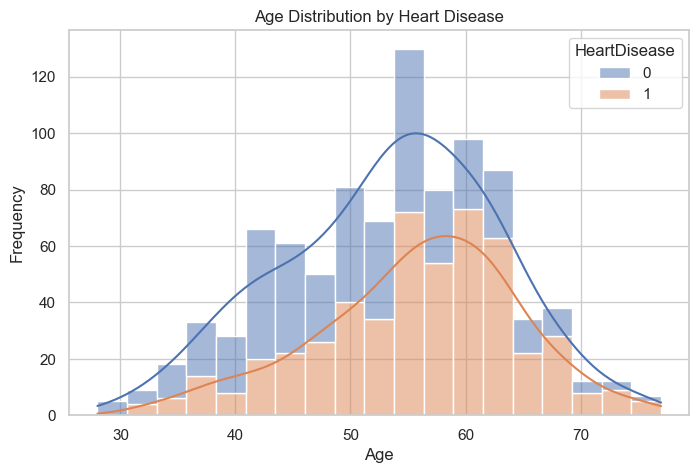

In [17]:
# Histogram of age distribution by heart disease
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, multiple='stack')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<h3>Key Observations</h3><br>
<h3>Age Trend:</h3><br>

Patients with heart disease (1) tend to be older (median age likely ~55-60).<br>

Patients without heart disease (0) are younger (median age likely ~45-50).<br>

<h3>Spread of Data:</h3><br>

The interquartile range (box width) shows variability in both groups.<br>

Older age groups (50+) have higher heart disease prevalence.<br>

<h3> Pairplot of Selected Features</h3>

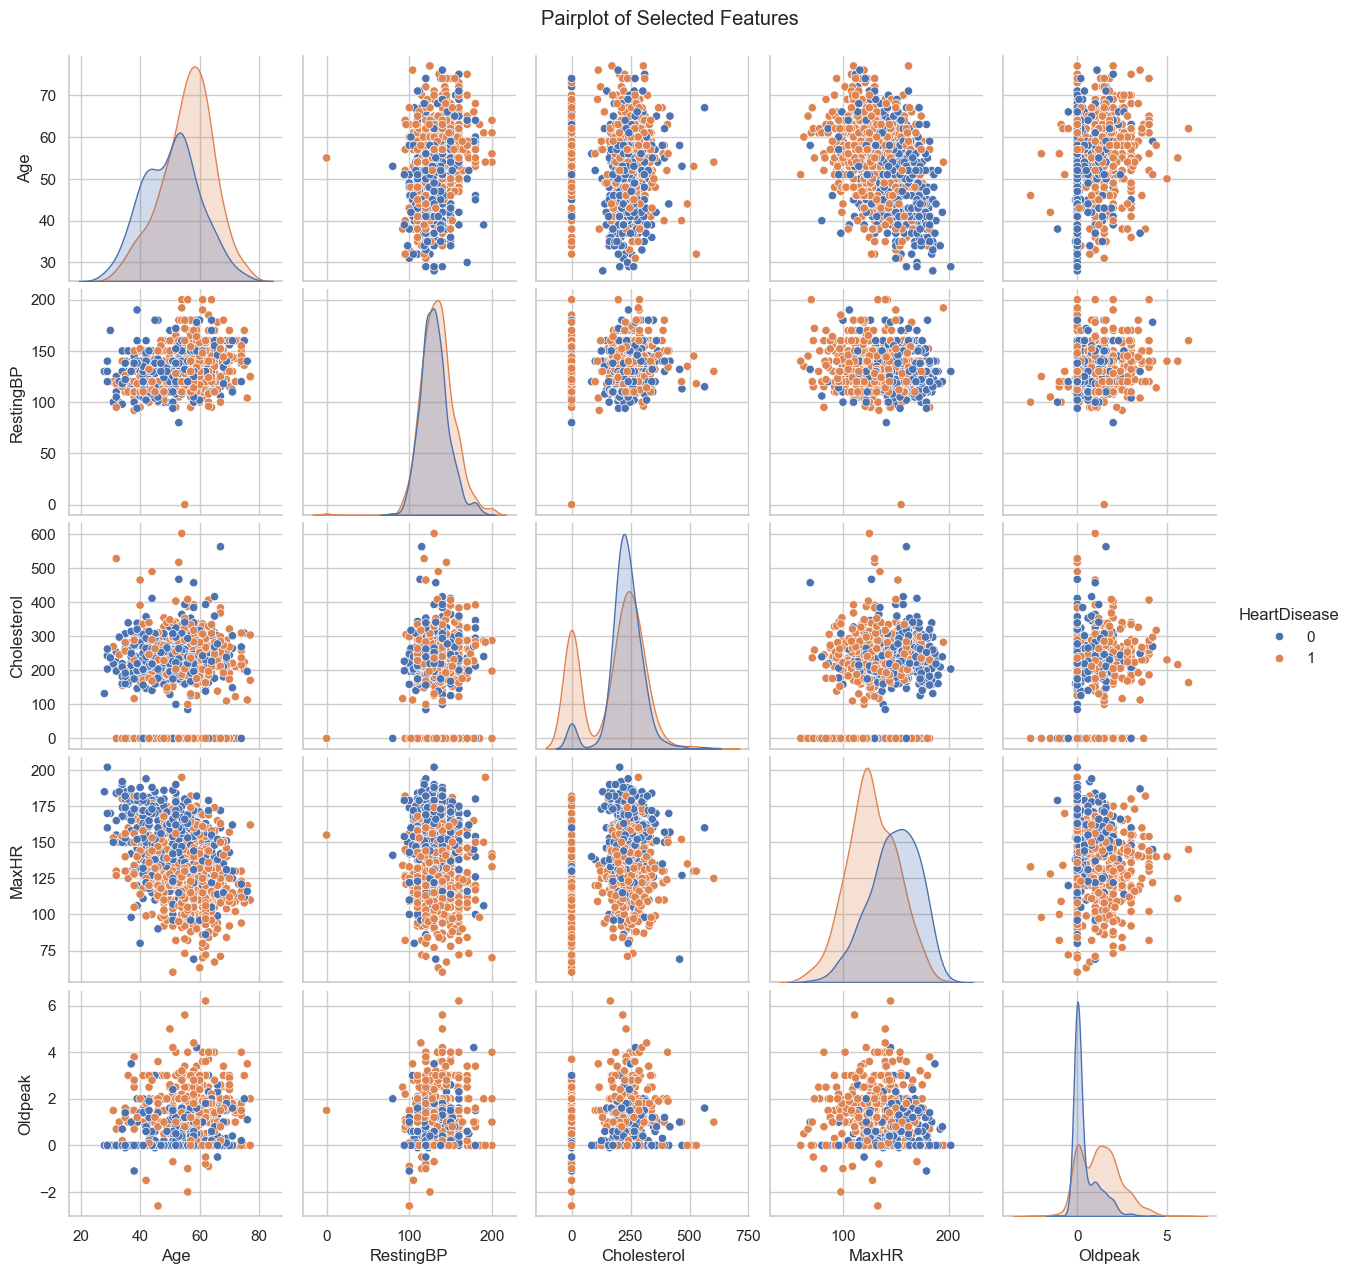

In [18]:
# Select relevant features
selected_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

# Pairplot
sns.pairplot(df[selected_features], hue='HeartDisease')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


<h3>Insights:</h3><br>
<h3>Age:</h3><br>
People with heart disease (orange) tend to be slightly older on average compared to those without (blue).<br>
<h3>RestingBP (Resting Blood Pressure):</h3><br>
There is significant overlap between the two groups, suggesting this feature alone may not strongly distinguish heart disease status.<br>
<h3>Cholesterol:</h3><br>
Both groups have a wide range of cholesterol values, but there is no clear separation between those with and without heart disease.<br><br>
<h3>MaxHR (Maximum Heart Rate):</h3>
People without heart disease (blue) tend to have higher maximum heart rates, while those with heart disease (orange) are more spread out and often have lower MaxHR.<br>
<h3>Oldpeak:</h3><br>
Higher Oldpeak values are more common among people with heart disease (orange), indicating this feature may be useful for distinguishing between the two groups.<br>
<h3>Feature Relationships:</h3><br>
No strong linear relationships are visible between pairs of features, but some combinations (like MaxHR vs. Oldpeak) show slight group separation.<br>

<h3>One-hot encoding using Pandas</h3>
First we will remove the binary variables, because one-hot encoding them would do nothing to them. To achieve this we will just count how many different values there are in each categorical variable and consider only the variables with 3 or more values.

In [19]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

As a reminder, one-hot encoding aims to transform a categorical variable with n outputs into n binary variables.<br>

Pandas has a built-in method to one-hot encode variables, it is the function pd.get_dummies. There are several arguments to this function, but here we will use only a few. They are:<br>

data: DataFrame to be used<br>
prefix: A list with prefixes, so we know which value we are dealing with<br>
columns: the list of columns that will be one-hot encoded. 'prefix' and 'columns' must have the same length.<br>
For more information, you can always type help(pd.get_dummies) to read the function's full documentation.<br>


In [20]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
df = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)

In [21]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


Let's choose the variables that will be the input features of the model.<br>

The target is HeartDisease.<br>
All other variables are features that can potentially be used to predict the target, HeartDisease.<br>

In [22]:
features = [x for x in df.columns if x not in 'HeartDisease'] ## Removing our target variable

We started with 11 features. Let's see how many feature variables we have after one-hot encoding.

In [23]:
print(len(features))

20


<h3>Splitting the Dataset</h3>

In [24]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None
)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value

In [25]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)

# We will keep the shuffle = True since our dataset has not any time dependency.

In [26]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


<h1> Building the Model</h1>

<h3>Decision Tree</h3>

In [27]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

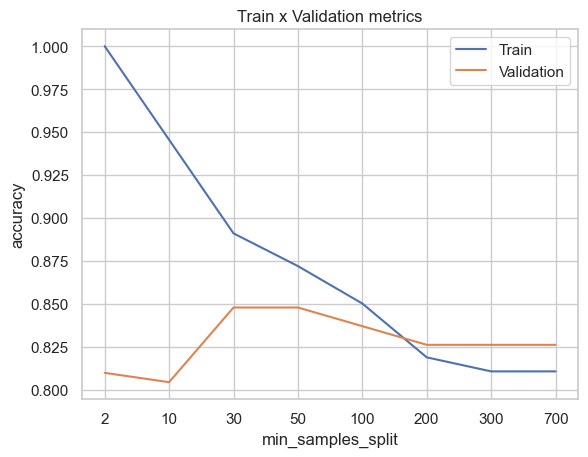

In [28]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

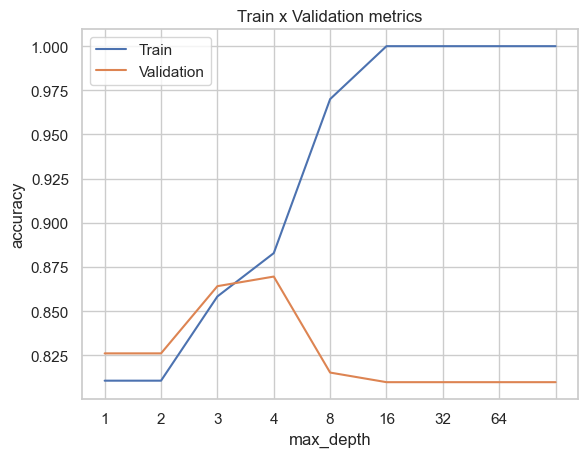

In [29]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [30]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [31]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8583
Metrics validation:
	Accuracy score: 0.8641


We can also increase this accuracy by using Random Forest or XGBoost Trees Ensemble.

<h1>Model Evaluation</h1>

<h3>ROC-AUC Curve</h3>

ROC-AUC Score: 0.9068


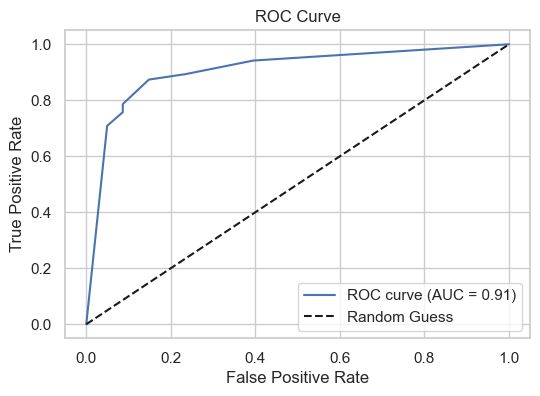

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for the positive class
y_val_proba = decision_tree_model.predict_proba(X_val)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<h3>Confusion Matrix</h3>

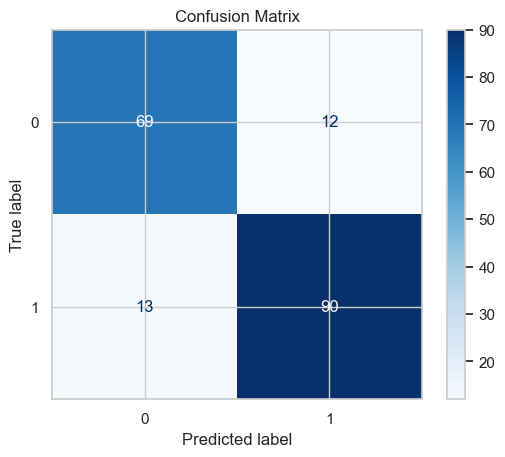

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_val_pred = decision_tree_model.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<h3> Feature Importance Analysis</h3>

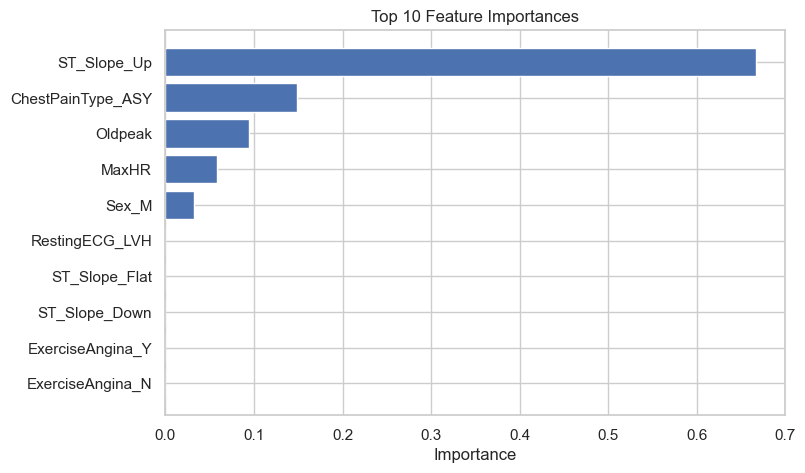

              Feature  Importance
19        ST_Slope_Up    0.666914
8   ChestPainType_ASY    0.148131
5             Oldpeak    0.094211
4               MaxHR    0.058228
7               Sex_M    0.032516
12     RestingECG_LVH    0.000000
18      ST_Slope_Flat    0.000000
17      ST_Slope_Down    0.000000
16   ExerciseAngina_Y    0.000000
15   ExerciseAngina_N    0.000000


In [36]:
# Get feature importances from the model
importances = decision_tree_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['Feature'][:10][::-1], feat_imp_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

# Print the top features
print(feat_imp_df.head(10))

<h1>Model Deployment</h1>

In [37]:
import joblib
joblib.dump(decision_tree_model, 'heart_model.pkl')

['heart_model.pkl']

In [1]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

In [3]:
import joblib
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML

model = joblib.load('heart_model.pkl')

# Define input widgets
age = widgets.IntSlider(min=20, max=80, step=1, description='Age')
sex = widgets.Dropdown(options=[('Male', 1), ('Female', 0)], description='Sex')
chest_pain = widgets.Dropdown(
    options=[('Typical Angina', 'ChestPainType_TA'),
             ('Atypical Angina', 'ChestPainType_ATA'),
             ('Non-Anginal Pain', 'ChestPainType_NAP'),
             ('Asymptomatic', 'ChestPainType_ASY')],
    description='Chest Pain'
)
resting_bp = widgets.IntSlider(min=80, max=200, step=1, description='RestingBP')
cholesterol = widgets.IntSlider(min=100, max=600, step=1, description='Cholesterol')
fasting_bs = widgets.Dropdown(options=[('>120 mg/dl', 1), ('<=120 mg/dl', 0)], description='FastingBS')
resting_ecg = widgets.Dropdown(
    options=[('Normal', 'RestingECG_Normal'),
             ('ST', 'RestingECG_ST'),
             ('LVH', 'RestingECG_LVH')],
    description='RestingECG'
)
max_hr = widgets.IntSlider(min=60, max=202, step=1, description='MaxHR')
exercise_angina = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='ExerciseAngina')
oldpeak = widgets.FloatSlider(min=0, max=6, step=0.1, description='Oldpeak')
st_slope = widgets.Dropdown(
    options=[('Up', 'ST_Slope_Up'),
             ('Flat', 'ST_Slope_Flat'),
             ('Down', 'ST_Slope_Down')],
    description='ST_Slope'
)

button = widgets.Button(description="Predict", button_style='success')
output = widgets.Output()

def on_button_clicked(b):
    input_dict = {
        'Age': age.value,
        'RestingBP': resting_bp.value,
        'Cholesterol': cholesterol.value,
        'FastingBS': fasting_bs.value,
        'MaxHR': max_hr.value,
        'Oldpeak': oldpeak.value,
        'Sex_M': 1 if sex.value == 1 else 0,
        'Sex_F': 1 if sex.value == 0 else 0,
        'ChestPainType_TA': 1 if chest_pain.value == 'ChestPainType_TA' else 0,
        'ChestPainType_ATA': 1 if chest_pain.value == 'ChestPainType_ATA' else 0,
        'ChestPainType_NAP': 1 if chest_pain.value == 'ChestPainType_NAP' else 0,
        'ChestPainType_ASY': 1 if chest_pain.value == 'ChestPainType_ASY' else 0,
        'RestingECG_Normal': 1 if resting_ecg.value == 'RestingECG_Normal' else 0,
        'RestingECG_ST': 1 if resting_ecg.value == 'RestingECG_ST' else 0,
        'RestingECG_LVH': 1 if resting_ecg.value == 'RestingECG_LVH' else 0,
        'ExerciseAngina_Y': 1 if exercise_angina.value == 1 else 0,
        'ExerciseAngina_N': 1 if exercise_angina.value == 0 else 0,
        'ST_Slope_Up': 1 if st_slope.value == 'ST_Slope_Up' else 0,
        'ST_Slope_Flat': 1 if st_slope.value == 'ST_Slope_Flat' else 0,
        'ST_Slope_Down': 1 if st_slope.value == 'ST_Slope_Down' else 0,
    }
    # Use your model's feature order
    model_features = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else list(input_dict.keys())
    X_input = pd.DataFrame([input_dict], columns=model_features)
    pred = model.predict(X_input)[0]
    proba = model.predict_proba(X_input)[0][1]
    with output:
        output.clear_output()
        if pred == 1:
            display(HTML(f"<h3 style='color:red;'>High risk of Heart Disease!<br>Probability: {proba:.2f}</h3>"))
        else:
            display(HTML(f"<h3 style='color:green;'>Low risk of Heart Disease.<br>Probability: {proba:.2f}</h3>"))

button.on_click(on_button_clicked)

form_items = widgets.VBox([
    age, sex, chest_pain, resting_bp, cholesterol, fasting_bs,
    resting_ecg, max_hr, exercise_angina, oldpeak, st_slope, button, output
])
display(form_items)